Based on a code from 3rd laboratories let us realize a competition. 
We will be solving the following problems:
1. De Jong
2. Rastrigin
3. Schwefel
in several dimensions.

using the following components and parameters:
1. Selection: tournament, roulette.
2. Crossover: single point, discrete, randomaverage.
3. Mutation: uniform, gaussian, boundary.
4. Mutation probability, mutation range.


after setting the general parameters by the teacher (problem, dimension, number of generation) please do a number of experiments looking for optimal parameters. Then the parameters will be entered into the online spreadsheet and run together by the teacher while you will be trying  to solve another problem. 






In [1]:
import random
import numpy as np
import sys
import math

def create_starting_population(individuals, chromosome_length, hypercube_size):
    # Set up an initial array of all zeros
    population = np.zeros((individuals, chromosome_length))
    # Loop through each row (individual)
    for i in range(individuals):
        for j in range(chromosome_length):
          population[i,j]=random.uniform(-hypercube_size,hypercube_size)    
    return population



Let's try to use the code above to create sample populations. Of course this should be a two-dimensional array of genotypes. Let us change the number of individuals and the length of chromosomes.

In [2]:
print (create_starting_population(10, 5,5.12))

[[-3.11610954  3.18063745  4.84821582  3.02779174 -0.88245895]
 [-3.34295745 -0.46532462 -3.39003343  1.61001734 -3.31222941]
 [ 3.42100244  3.83643452 -1.20145585 -3.72742417 -1.2509555 ]
 [-2.11421397  1.3459608  -4.20010241  0.90914396  2.74762982]
 [-0.39574013 -2.3816454   4.33315309 -4.26937025  1.68370111]
 [ 2.76166677 -3.3273418   4.18226395 -2.74911018  3.8185091 ]
 [-0.59691288 -5.08553547  1.32513584 -2.68895711  1.17783299]
 [ 3.92933664 -1.21124696 -3.52664401 -4.43454777 -1.62955766]
 [-5.01164483  2.37043336 -3.68069371  4.35659559 -4.44939541]
 [ 1.24800977  1.67604438 -1.93141907 -4.60609027  1.24557577]]


Let us create a real-value fitness function. In the beginning let it be the De Jong function http://www.geatbx.com/docu/fcnindex-01.html - a very simple convex one.


In [3]:
def calculate_fitness_dejong(population):
    fitness_scores = np.zeros(len(population))
    for i in range(len(population)):
      current_fitness = 0
      for j in range(len(population[i])):
        current_fitness += population[i,j] * population[i,j]
      fitness_scores[i]=current_fitness
    return fitness_scores

def calculate_fitness_rastrigin(population):
    fitness_scores = np.zeros(len(population))
    for i in range(len(population)):
      current_fitness = 10 * len(population[i])
      for j in range(len(population[i])):
        current_fitness += population[i,j] * population[i,j] - 10 * math.cos(2*math.pi* population[i,j])        
      fitness_scores[i]=current_fitness
    return fitness_scores

def calculate_fitness_schwefel(population):
    fitness_scores = np.zeros(len(population))
    dim = len(population[0])
    for i in range(len(population)):
      current_fitness = 418.9829 * dim
      for j in range(len(population[i])):
        current_fitness -= population[i,j] * math.sin(math.sqrt(math.fabs(population[i,j])))
      fitness_scores[i]=current_fitness
    return fitness_scores

And try this function. Note that for 2d arrays, axis=0 will sum the "columns" while axis=1 will sum the "rows". fitness_scores will thus hold the number of genes equal to the reference.

In [4]:
population = create_starting_population(6, 3,5.12)
print ('\nStarting population: \n', population)
scores = calculate_fitness_schwefel(population)
#scores = getattr(sys.modules[__name__], "calculate_fitness")(population)

print('\nScores: \n', scores)


Starting population: 
 [[ 3.57518671  2.42654671 -2.90168542]
 [ 3.70912134 -1.89301553  4.5134699 ]
 [-0.8196994  -1.45736789 -1.35988793]
 [ 1.52604819 -2.88159218  2.81442109]
 [-2.50577511 -2.43485098 -0.04679264]
 [ 2.06834159 -2.5768007   2.66309468]]

Scores: 
 [1254.00488765 1251.48906753 1260.20568094 1255.5678233  1261.89905229
 1254.8156691 ]


The code for defining the selection method follows. This is a tournament selection. Note we have to choose the individual with lower fitness - this is a minimization problem.

In [5]:
def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness <= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return the chromosome of the winner
    return population[winner, :]

def select_individual_by_roulette(population, scores):
    inverse_fitness = (lambda x: 1/x)(scores)

    sum_of_fitnesses = sum(inverse_fitness)
    random_stop = random.uniform(0,sum_of_fitnesses)

    current_sum=0
    for i in range(len(inverse_fitness)):
      current_sum+=inverse_fitness[i]
      if current_sum >= random_stop:
        return population[i, :]
    return population[i, :]

Let us try this.

In [6]:
# Test the roulette
population = create_starting_population(3, 5, 1)
scores = calculate_fitness_dejong(population)
print("Population:")
print(population)
print("Fitnesses:")
print(scores)
parent = select_individual_by_roulette(population,scores)
print("The chosen parent:")
print(parent)


Population:
[[-0.57672463 -0.92088899 -0.63107069 -0.43760599 -0.06114063]
 [ 0.79357683 -0.70491957 -0.74205685  0.31679165  0.74447713]
 [-0.36797069 -0.5139182  -0.96420906  0.09428055  0.83552265]]
Fitnesses:
[1.77413523 2.33192729 2.03620038]
The chosen parent:
[ 0.79357683 -0.70491957 -0.74205685  0.31679165  0.74447713]


Let us define the crossover method. Crossover is dependent on the representation, however the Python dynamic typing allows us to leave its implementation intact.

In [7]:
def breed_by_spoint(parent_1, parent_2):
    # Get length of chromosome
    chromosome_length = len(parent_1)
    
    # Pick crossover point, avoding ends of chromsome
    crossover_point = random.randint(1,chromosome_length-1)
    
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0:crossover_point],
                        parent_2[crossover_point:]))
    
    child_2 = np.hstack((parent_2[0:crossover_point],
                        parent_1[crossover_point:]))
    
    # Return children
    return child_1, child_2


def breed_by_discrete(parent_1, parent_2):
    # Get length of chromosome
    chromosome_length = len(parent_1)
    
    child_1 = []
    child_2 = []

    for i in range(chromosome_length):
      if random.uniform(0,1)<0.5:
        child_1.append(parent_1[i])
        child_2.append(parent_2[i])
      else:
        child_2.append(parent_1[i])
        child_1.append(parent_2[i])

    # Return children
    return child_1, child_2


def breed_by_randomaverage(parent_1, parent_2):
    # Get length of chromosome
    chromosome_length = len(parent_1)
    
    child_1 = []
    child_2 = []

    for i in range(chromosome_length):
        child_1.append(random.uniform(parent_1[i],parent_2[i]))
        child_2.append(random.uniform(parent_1[i],parent_2[i]))

    # Return children
    return child_1, child_2


And test this of course.

In [8]:
# Set up and score population
population = create_starting_population(100, 10,5.12)
scores = calculate_fitness_dejong(population)

# Pick two parents and dispplay
parent_1 = select_individual_by_tournament(population, scores)
parent_2 = select_individual_by_tournament(population, scores)

# Get children
child_1, child_2 = breed_by_randomaverage(parent_1, parent_2)

# Show output
print ('Parents')
print (parent_1)
print (parent_2)
print ('Children')
print (child_1)
print (child_2)

Parents
[ 1.03140653 -3.24638252  4.31278327  2.39791008 -3.93290718  0.85152166
 -1.35282247  0.50853343  1.85090547 -5.07719334]
[-2.89417619  0.36371553 -2.23144377  0.63367266  3.04326086  1.80806883
  1.30942992 -2.91369625  1.89491977 -3.60573038]
Children
[-0.7114839936186437, -0.5163951399821869, 1.1799757200639043, 1.9205049844437105, 0.32705920868512184, 1.4261845397131683, 0.3950814750492899, -2.50850922251169, 1.8878692890863407, -4.402561774329952]
[-0.5438120798278099, -2.13934832965667, -0.37547099299818854, 1.7206303698551664, -2.559602491854784, 1.6537747679307762, -0.6773466969935393, -1.6866658154013723, 1.865399714429472, -4.036675575517664]


Now the procedure for random mutation follows. We can't flip the gene - now it should be randomly modified. Say, we will add a small distortion to each gene, chosen from the range [-0.1,0.1] - of course the deviation should be a parameter of the algorithm.

In [9]:
def randomly_mutate_uniform(population, mutation_probability, mutation_range):
    
    # Apply random mutation      
        for i in range(len(population)):
          for j in range(len(population[1])):
            if random.uniform(0,1) < mutation_probability:
              population[i,j] += random.uniform(-mutation_range,mutation_range)

        # Return mutation population
        return population

def randomly_mutate_gaussian(population, mutation_probability, mutation_range):
    
    # Apply random mutation      
        for i in range(len(population)):
          for j in range(len(population[1])):
            if random.uniform(0,1) < mutation_probability:
              population[i,j] = random.gauss(population[i,j],mutation_range)

        # Return mutation population
        return population
    
def randomly_mutate_boundary(population, mutation_probability, mutation_range):   
    # Warning - the mutation probability must be small and mutation range must equal to the half of hypercube edge
        for i in range(len(population)):
          for j in range(len(population[1])):
            if random.uniform(0,1) < mutation_probability:
              if random.uniform(0,1)<0.5:
                population[i,j] = -mutation_range
              else:
                population[i,j] = mutation_range

        # Return mutation population
        return population
    

And let us test this one too.

In [11]:
population = create_starting_population(100, 15,5.12)
scores = calculate_fitness_dejong(population)

# Pick two parents and display
parent_1 = select_individual_by_tournament(population, scores)
parent_2 = select_individual_by_tournament(population, scores)

# Get children and make new population 
child_1, child_2 = breed_by_spoint(parent_1, parent_2)
population = np.stack((child_1, child_2))

# Mutate population
print ("Population before mutation")
print (population)
population = randomly_mutate_boundary(population, 0.25, 0.01)
print ("Population after mutation")
print (population)

Population before mutation
[[ 4.13353776  3.63357943 -3.88002648  2.45442111  1.99839989  0.13857751
  -0.5520425  -2.29327546  2.23152751 -1.92548306 -3.78325492 -3.85116311
   1.94272821  1.25999999 -0.07074238]
 [-3.28418663 -4.55195719  0.93841223  2.3617044   3.03434551  0.78685405
   4.9008313   3.68157808 -0.63246277 -0.90018445  4.22120614 -2.69418209
  -4.93445454 -2.33455624  2.29080841]]
Population after mutation
[[ 4.13353776  3.63357943 -3.88002648  2.45442111  1.99839989  0.13857751
  -0.5520425  -0.01        2.23152751 -1.92548306 -0.01       -0.01
   1.94272821 -0.01       -0.07074238]
 [-3.28418663 -4.55195719  0.93841223  2.3617044   3.03434551  0.78685405
   4.9008313   3.68157808 -0.63246277 -0.90018445  4.22120614 -2.69418209
  -4.93445454 -2.33455624  2.29080841]]


The code of the main algorithm follows.

Starting best score, % target:  1719.245351744204
End best score, % target:  1151.6319897792046
Starting best score, % target:  1661.7549491793159
End best score, % target:  1177.3486245628878


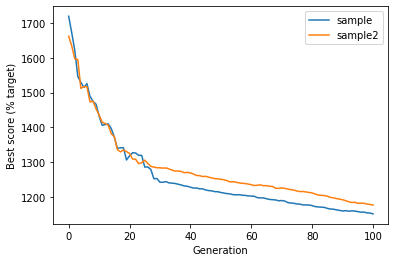

In [13]:
# *************************************
# ******** MAIN ALGORITHM CODE ********
# *************************************

# Constant for all
chromosome_length = 100
hypercube_size = 5.12
population_size = 30 # this number must be even
maximum_generation = 100
current_fitness_function = "rastrigin"




# To be set individually
current_selection_function = "tournament"
current_crossover_method = "spoint"
current_mutation_function = "uniform"
mutation_probability = 0.2
mutation_range = 0.01






def run_main_algorithm(current_selection_function, current_crossover_method, current_mutation_function, mutation_probability, mutation_range):
  best_score_progress = [] # Tracks progress
  # Create starting population
  population = create_starting_population(population_size, chromosome_length,hypercube_size)


  selection_function = getattr(sys.modules[__name__], "select_individual_by_%s" % current_selection_function)
  crossover_function = getattr(sys.modules[__name__], "breed_by_%s" % current_crossover_method)
  mutation_function = getattr(sys.modules[__name__], "randomly_mutate_%s" % current_mutation_function)
  fitness_function = getattr(sys.modules[__name__], "calculate_fitness_%s"%current_fitness_function)


  # Display best score in starting population
  scores = fitness_function(population)
  best_score = np.min(scores)
  print ('Starting best score, % target: ',best_score)

  # Add starting best score to progress tracker
  best_score_progress.append(best_score)

  
  # Now we'll go through the generations of genetic algorithm
  for generation in range(maximum_generation):
      # Create an empty list for new population
      new_population = []
    

      # Create new popualtion generating two children at a time
      for i in range(int(population_size/2)):
          parent_1 = selection_function(population,scores)
          parent_2 = selection_function(population,scores)
          child_1, child_2 = crossover_function(parent_1, parent_2)
          new_population.append(child_1)
          new_population.append(child_2)
      
      # Replace the old population with the new one
      population = np.array(new_population)

      # Apply mutation
      population = mutation_function(population, mutation_probability, mutation_range)
      
      # Score best solution, and add to tracker
      #scores = calculate_fitness(population)
      scores = fitness_function(population)
      best_score = np.min(scores)
      best_score_progress.append(best_score)

  # GA has completed required generation
  print ('End best score, % target: ', best_score)
  return best_score_progress





bsp = run_main_algorithm("tournament","spoint","uniform",0.2,0.01)
bsp2 = run_main_algorithm("tournament","spoint","uniform",0.2,0.01)

# Plot progress
import matplotlib.pyplot as plt
plt.plot(bsp, label='sample')
plt.plot(bsp2, label='sample2')

plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.legend()
plt.show()

Adapted from: [https://pythonhealthcare.org/](https://pythonhealthcare.org/) prepared by Michael Allen 
m.allen@exeter.ac.uk